In [19]:
%matplotlib inline

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from datetime import datetime



In [23]:
def parse_date(d):
    return datetime.strptime(d, '%d/%m/%y %H')

data1 = pd.read_csv('training_dataset1.csv', parse_dates=True, squeeze=True, date_parser=parse_date, index_col=0)
print(data1.head(5))

                         L_T1      L_T2      L_T3      L_T4      L_T5  \
DATETIME                                                                
2014-01-06 00:00:00  0.509730  2.049003  3.191145  2.792634  2.656091   
2014-01-06 01:00:00  0.412580  2.009072  3.642565  2.831673  3.126387   
2014-01-06 02:00:00  0.320112  1.986093  4.140192  3.256733  3.574601   
2014-01-06 03:00:00  0.332879  2.009203  4.673478  3.744497  3.952379   
2014-01-06 04:00:00  0.483496  2.089049  5.237937  4.409456  3.504676   

                         L_T6      L_T7      F_PU1  S_PU1      F_PU2  \
DATETIME                                                               
2014-01-06 00:00:00  5.316831  1.562321  98.998444      1  99.018150   
2014-01-06 01:00:00  5.494855  1.852043  99.095901      1  99.115639   
2014-01-06 02:00:00  5.500000  2.246126  98.420959      1  98.440498   
2014-01-06 03:00:00  5.500000  3.203573  97.575172      1  97.594460   
2014-01-06 04:00:00  5.500000  4.439714  97.351059      

# Familiarization task – 1 A

Load the BATADAL sensor data (start with training data 1, optimize using training data 2, test 
with test data) into your favorite analysis platform (R, Matlab, Python, Weka, KNIME, ...) and 
understand the data. Answer the following questions: 

* What kinds of signals are there?
* Are the signals correlated? Do they show cyclic behavior?
* Is predicting the next value in a series easy or hard? Use any method from class.

Visualize these types, the presence or absence of correlation, and the performance of p

### Data description
All data are provided in tabular format with the first column reporting the timestamp of the readings and the
remaining columns reporting the value of each different sensor. An additional column contains a binary flag
to discriminate normal conditions (flag = 0) from under attack (flag = 1). This column will contain the value
-999 for unlabeled data. The available SCADA readings are:
* Water level in each tank;
* Status (0 for OFF/CLOSED, 1 for ON/OPEN) for each pump and valve in the system;
*  Flow through each pump and valve;
*  Suction pressure and discharge pressure for each valve and pumping station.
The variables are indicated using the prefix L for water level, S for status, F for flow, and P for pressure.
The sensor labels (i.e., header of the data files) are formed by linking the variable prefix with the label of a
4
node/component in the map using the underscore symbol _. For instance, L_T1 indicates the water level in
T1, S_PU1 the status of pump PU1, while P_J280 and P_J269 are the suction and discharge pressures of
pumping station S1 (as shown in the .inp file, junction J280 and J269 are respectively located at the inlet
and outlet of pumping station S1).

The flow data unit is LPS, pressure and water level units are meters.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fb7454792b0>,
      dtype=object)

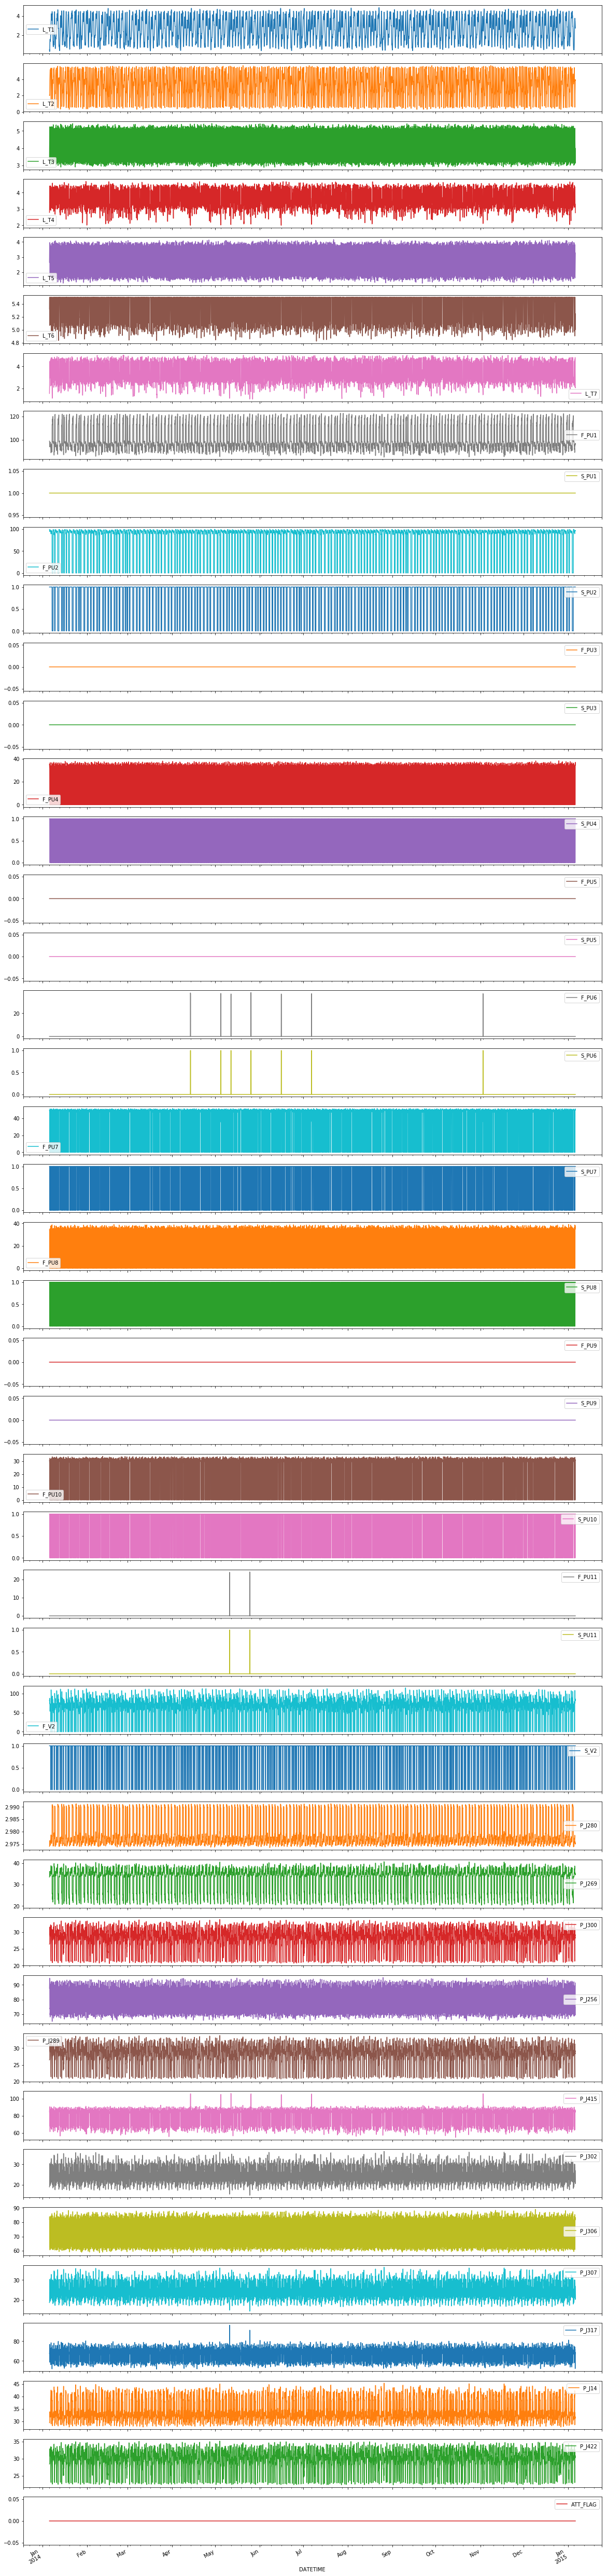

In [24]:
data.plot(subplots=True,figsize=(20, 100))

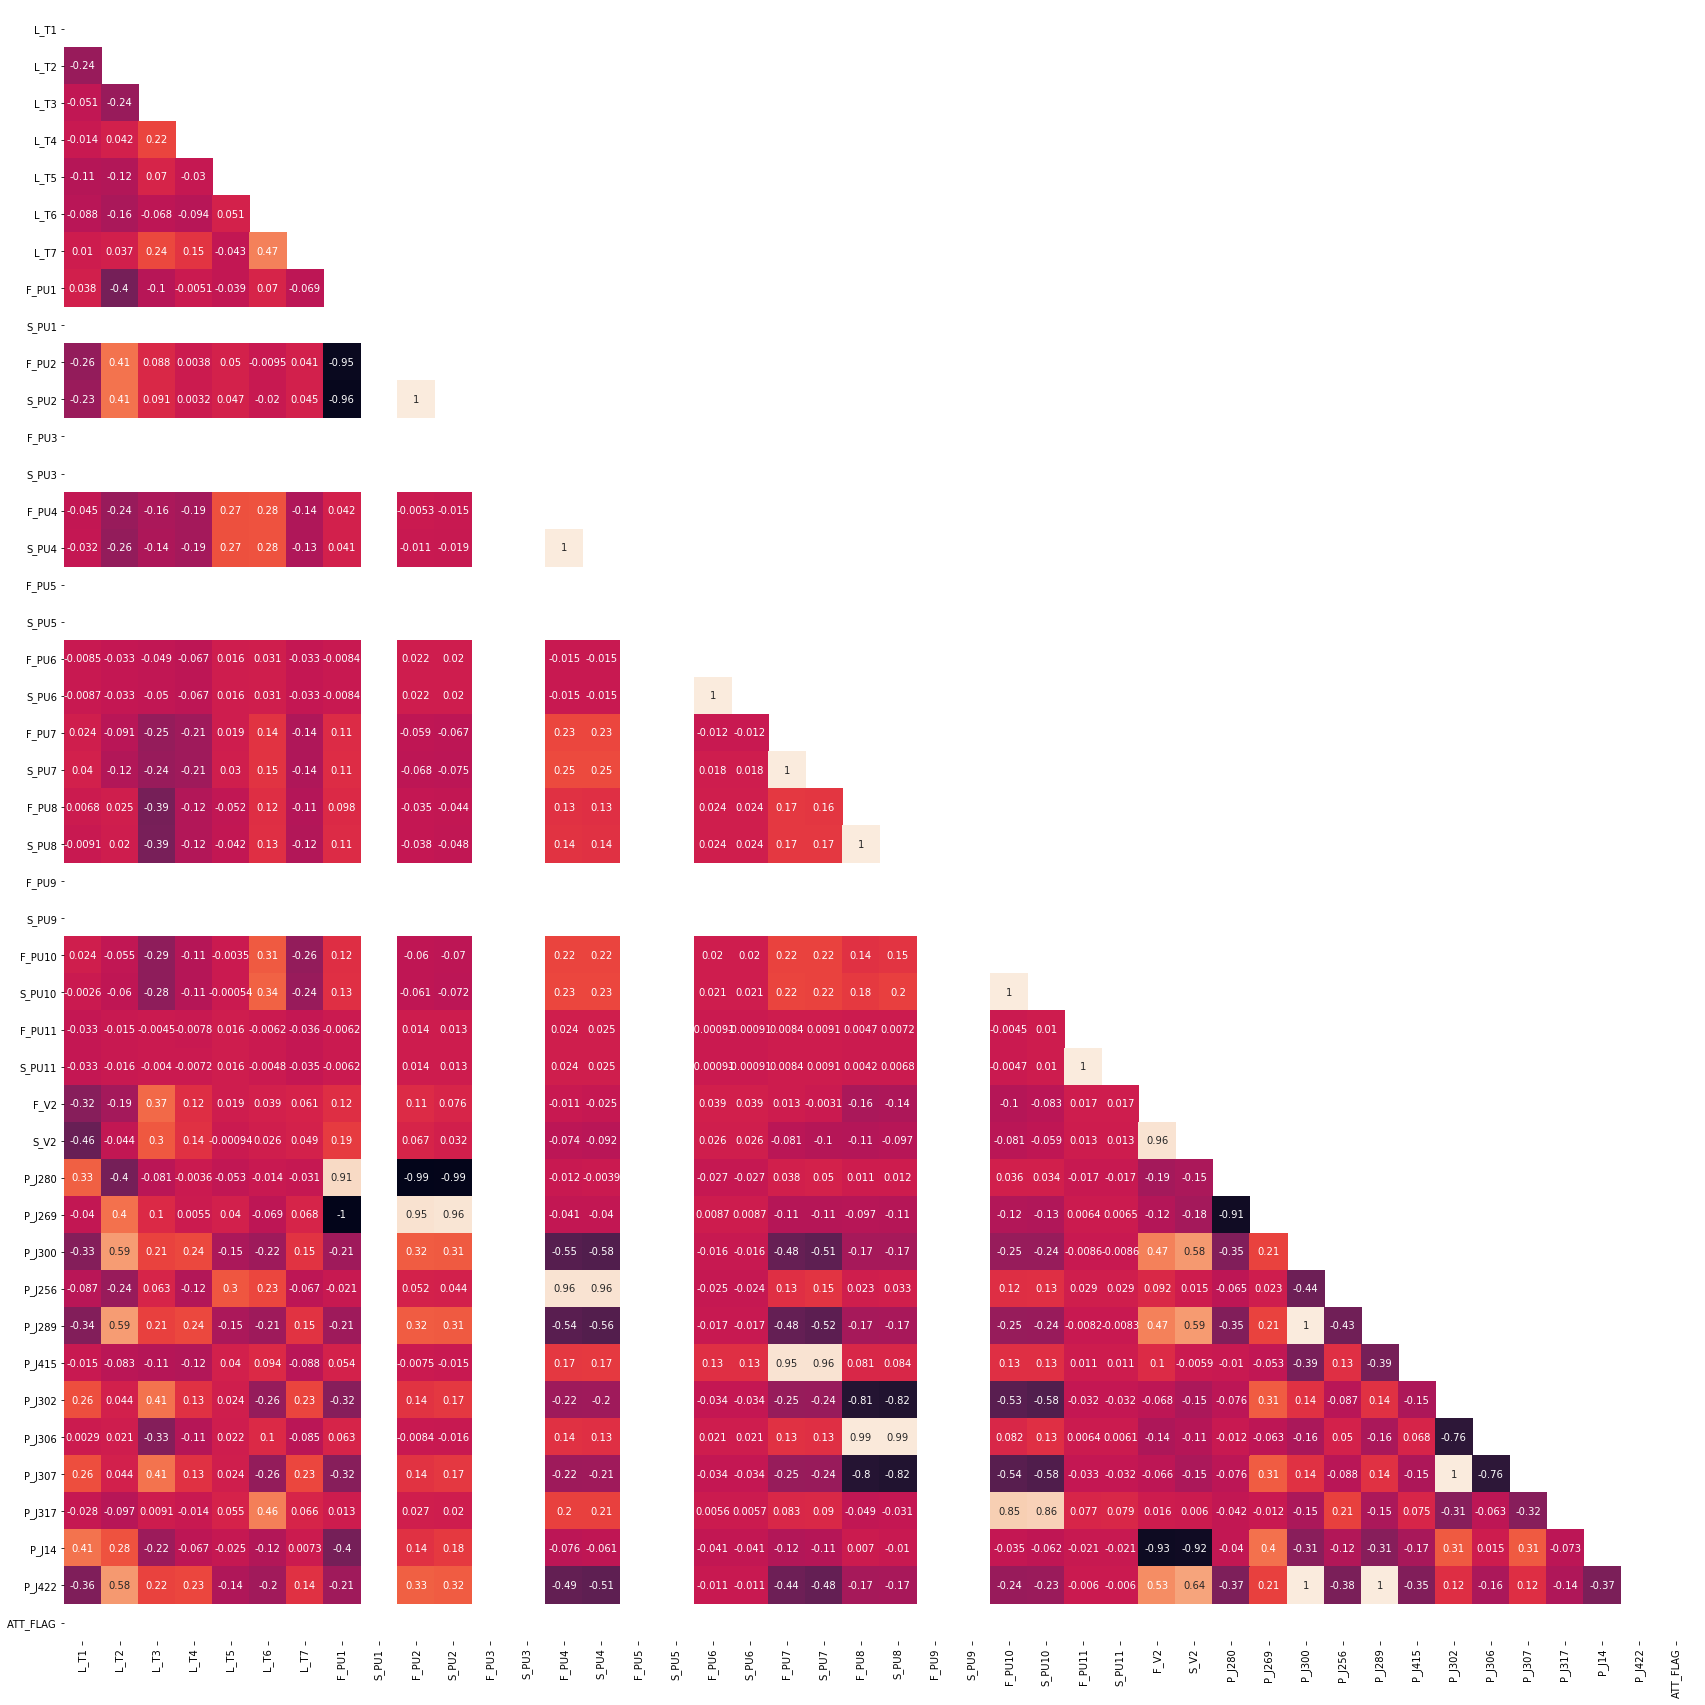

In [25]:
corr = data1.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

fig, ax = plt.subplots()
fig.set_size_inches(30, 30)

sns.heatmap(corr, annot=True, mask=mask, square=True , ax=ax, cbar=False)

Confusion matrices

In [26]:
def persistance(values):
    df = pd.concat([values.shift(1), values], axis=1)
    df.columns = ['t-1', 't+1']

    X = df.values
    train_size = int(len(X) * 0.8)
    train, test = X[1:train_size], X[train_size:]
    train_X, train_y = train[:,0], train[:,1]
    test_X, test_y = test[:,0], test[:,1]

    predictions = [x for x in test_X]
    test_score = mean_squared_error(test_y, predictions)
    print('{}; MSE: {:.3f}'.format(column, test_score))
    
    return test_score

def linear_regression(values):
    pass
    
for column in data:
    if column not in ['DATETIME', 'ATT_FLAG']:
        values = pd.DataFrame(data1[column].values)
        persistance(values)
        linear_regression(values)

NameError: name 'mean_squared_error' is not defined